In [50]:
%load_ext autoreload
%autoreload 2
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,6)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## p-values measure the evidence against $H_0$

Large values of $|z|$ are evidence against $H_0$: The larger $|z|$ is, the stronger the evidence.<br>
The strenght of the evidence is measured by the **p-value** (or: **observed significance level**):

The p-value is the probability of getting a value of $z$ as extreme or more extreme than the observed $z$, assuming $H_0$ is true.

But if $H_0$ is true, then $z$ follows that standard normal curve, according to the central limit theorem, so the p-value can be computed with normal approximation.

The smaller the p-value, the stronger the evidence against $H_0$. Often the criterion for rejecting $H_0$ is a p-value smaller than 5%. Then the result is called **statistically significant**.

In the example: "We toss a coin 10 times and get 7 tails. Is this sufficient evidence to conclude that the coin is biased?"

20.4% is not smaller than 5%, so we would not reject the null hypothesis. If a coin is fair, then there's a 20.4% chance to get such an extreme outcome. In other words, this is not a rare event, so we cannot conclude that the coin is not fair.

Note that the p-value does not give the probability that $H_0$ is true, as $H_0$ is either true or not - there are no chances involved. Rather, it gives the probability of seeing a statistic as extreme, or more extreme, that the observed one, assuming $H_0$ is true.

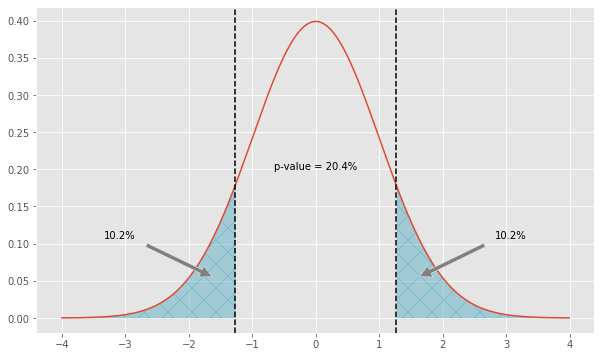

In [51]:

mu = 0
variance = 1
sigma = math.sqrt(variance)

# Create the curve from -4σ to 4σ
x = np.arange(mu - 4*sigma, mu + 4*sigma, 0.01)
y = norm.pdf(x, mu, sigma)

ax = sns.lineplot(x=x, y=y)
kde_x, kde_y = ax.lines[0].get_data()

la, lb = -1.27, 1.27

ax.axvline(la, color = 'k', linestyle="--")
ax.axvline(lb, color = 'k', linestyle="--")

_ = ax.fill_between(kde_x, kde_y, 
where=(kde_x < la) | (kde_x > lb) , 
interpolate=True, color='#5fb0c7', hatch= 'x', alpha=0.50)


_ = ax.annotate("10.2%", xy=(1.5, 0.05),  xycoords='data',
            xytext=(0.85, 0.30), textcoords='axes fraction',
            arrowprops=dict(facecolor='gray', shrink=0.1),
            horizontalalignment='center', verticalalignment='center',
            )

_ = ax.annotate("10.2%", xy=(-1.5, 0.05),  xycoords='data',
            xytext=(0.15, 0.30), textcoords='axes fraction',
            arrowprops=dict(facecolor='gray', shrink=0.1),
            horizontalalignment='center', verticalalignment='center',
            )

_ = ax.annotate(f'p-value = 20.4%', xy=(0.0, 0.2), horizontalalignment='center')
